In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from gensim.models import Word2Vec, FastText
import gensim.downloader as api


In [2]:
glove = api.load("glove-wiki-gigaword-100")


In [3]:
sentences = [
    ["king", "queen", "man", "woman"],
    ["paris", "france", "rome", "italy"],
    ["apple", "fruit", "banana", "orange"],
    ["car", "engine", "wheel", "drive"]
]

word2vec = Word2Vec(sentences, vector_size=100, window=3, min_count=1)
fasttext = FastText(sentences, vector_size=100, window=3, min_count=1)


In [4]:
print("GloVe:", glove.similarity("king", "queen"))
print("Word2Vec:", word2vec.wv.similarity("king", "queen"))
print("FastText:", fasttext.wv.similarity("king", "queen"))


GloVe: 0.7507691
Word2Vec: -0.09822883
FastText: -0.19001128


In [5]:
print(glove.most_similar(
    positive=["king", "woman"],
    negative=["man"],
    topn=3
))


[('queen', 0.7698540687561035), ('monarch', 0.6843380928039551), ('throne', 0.6755735874176025)]


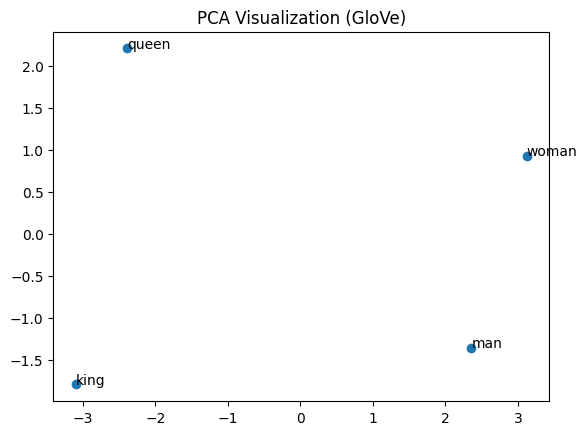

In [6]:
words = ["king", "queen", "man", "woman"]

vectors = [glove[word] for word in words]

pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, (result[i, 0], result[i, 1]))

plt.title("PCA Visualization (GloVe)")
plt.show()


In [7]:
print("Word2Vec OOV test:")
try:
    print(word2vec.wv["kingly"])
except KeyError:
    print("Word2Vec cannot handle OOV.")

print("\nFastText OOV test:")
print(fasttext.wv["kingly"])


Word2Vec OOV test:
Word2Vec cannot handle OOV.

FastText OOV test:
[ 1.1881924e-03  1.1259549e-03  6.3188322e-04 -1.0018270e-03
 -1.5134178e-03  7.3352910e-04 -1.8697760e-04 -1.2454969e-03
 -1.0682778e-03  2.6128413e-03  4.3142831e-04  3.3839137e-04
  1.0749922e-03  1.6872266e-03  9.4215345e-04  1.8260257e-04
  2.9105255e-03 -9.1495016e-04  3.3636661e-03  1.0704028e-03
  1.2115509e-04  8.6711493e-04  1.3933170e-03  6.0783073e-05
  3.8896219e-04  4.5875015e-04  1.7751171e-03 -2.6225394e-03
  1.8001674e-04  1.7527008e-04 -4.0891900e-04 -2.3575842e-04
 -2.2237743e-03 -1.5408276e-03 -5.7759986e-04 -2.1750042e-03
 -1.0398765e-03 -1.8776676e-03 -1.2755068e-03 -3.9081325e-04
 -1.1895088e-03 -3.5738086e-04  2.5248562e-04 -2.6466438e-04
 -8.6735247e-04  4.9363781e-04 -3.8362539e-04 -9.3571696e-04
  1.8867145e-03  1.4494165e-03 -1.1094178e-03 -8.2154525e-04
  2.0000183e-03 -1.0362960e-03  2.4492858e-04 -5.8083393e-04
 -1.1915690e-03 -1.4436950e-03  8.5604162e-04  4.7250080e-04
 -9.2776655e-04  2